In [40]:
import pandas as pd
scores = pd.read_csv('../../results/model_analysis_scores-wpm+cased.csv').set_index(['Layers', 'Dataset'])

In [45]:
EM_vals = []
F1_vals = []

layers = 24

for a_h in scores.columns:
    for row in scores.loc[f'L={layers}'][a_h].reset_index().itertuples(index=False):
        if pd.isna(row._1) == True: #for A=16|H=1024 for L=2 through L=12
            continue
        em_f1 = row._1.split()
        if len(em_f1) == 3: #for squad
            EM_vals.append([row.Dataset, a_h, float(em_f1[0])])
            F1_vals.append([row.Dataset, a_h, float(em_f1[-1])])
        else: #for other datasets
            EM_vals.append([row.Dataset, a_h, float(em_f1[0])])
            F1_vals.append([row.Dataset, a_h, float(em_f1[2])])

In [3]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [46]:
import os
masking_strategy = 'word-piece-masking'
normalization_strategy = 'cased'

if not os.path.isdir(f'../../results/figures_model_analysis/{masking_strategy}'):
    os.mkdir(f'../../results/figures_model_analysis/{masking_strategy}')
    print('Masking Strategy folder created')

if not os.path.isdir(f'../../results/figures_model_analysis/{masking_strategy}/{normalization_strategy}'):
    os.mkdir(f'../../results/figures_model_analysis/{masking_strategy}/{normalization_strategy}')
    print('Normalization strategy folder created')     

path = f'../../results/figures_model_analysis/{masking_strategy}/{normalization_strategy}/L={layers}'
if not os.path.isdir(path):
    os.mkdir(path)
    print('Output Path Created...')

Output Path Created...


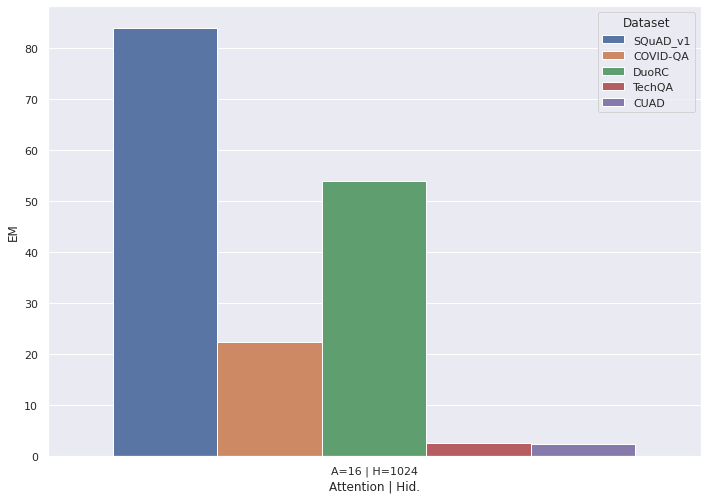

In [47]:
EM_DF = pd.DataFrame(EM_vals, columns=['Dataset', 'Attention | Hid.', 'EM'])
sns.barplot(data=EM_DF, x='Attention | Hid.', y='EM', hue='Dataset').figure.savefig(f"{path}/EM_plot")

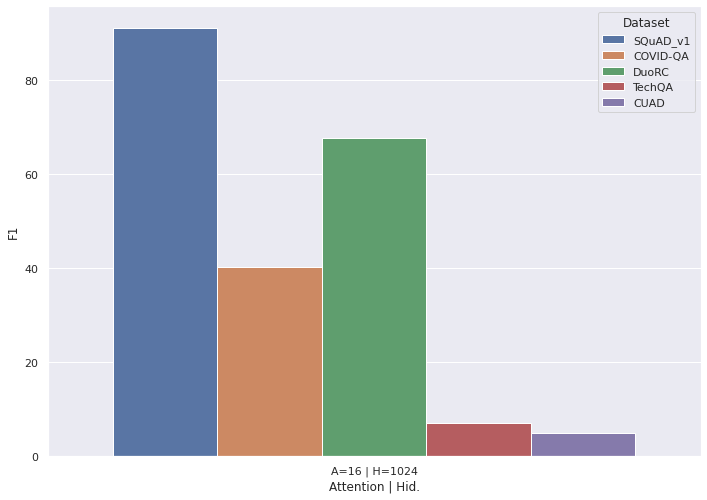

In [48]:
F1_DF = pd.DataFrame(F1_vals, columns=['Dataset', 'Attention | Hid.', 'F1'])
sns.barplot(data=F1_DF, x='Attention | Hid.', y='F1', hue='Dataset').figure.savefig(f"{path}/F1_plot")